In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 1: Reading the data with python**
Drop the duplicates in the file because having duplicates may cause false results or less accuracy in the final prediction model.



In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

filePath = '/content/drive/MyDrive/Books/Medical_insurance.csv'
MediInsurance = pd.read_csv(filePath)

MediInsurance=MediInsurance.drop_duplicates()
print('Shape After deleting duplicate values:', MediInsurance.shape)


Shape After deleting duplicate values: (1337, 7)


# **Getting the datatypes of the data columns we have in the data set**

Printing the HEAD (First 10 rows) and the TAIL (Last 10 Rows ) along with the information about the datatypes to get a clear idea about the data set in average.

In [ ]:
MediInsurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
MediInsurance.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [ ]:
MediInsurance.tail(10)

age     sex     bmi  children smoker     region      charges
1328   23  female  24.225         2     no  northeast  22395.74424
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1331   23  female  33.400         0     no  southwest  10795.93733
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

In [ ]:
MediInsurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# **Key observations from Step 1 about Data Description**

This file contains 1337 details about various data collected when people apply to a medical insurance.

There are 7 attributes and they are outlined below.
*   Age = age of the applicant
*   Sex = sex of the applicant (Male or Female)
*   BMI = Body Mass Index of the applicant
*   Children = number of children included in the mecial cover (If any)
*   Smoker = does the applicant smoke or not
*   Region = mainly 4 regions that the applicants are located
*   Charges = total charges thats going to cost for the full cover




Checking if there are any null valus in the dataset before proceeding since we can not get accurate details with null values or columns


# Step 2 : Problem Statement Definition



*   Creating a prediction model to **predict the charges of the medical insurance cover**

*   **Target Variable:** Charges


*   **Predictors/Features:** Age, Sex, BMI, Children, Smoker, Region





# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.)

<Axes: >

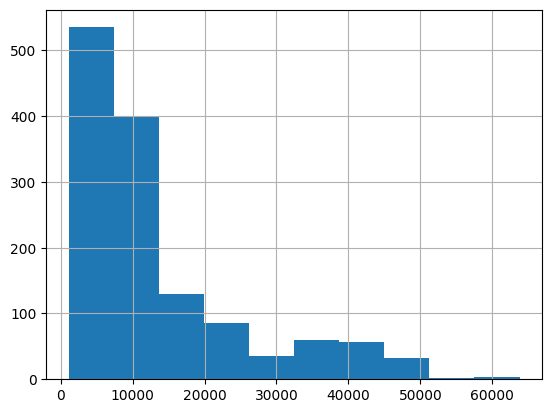

In [ ]:
%matplotlib inline
MediInsurance['charges'].hist()

**Observations from Step 4**

> Even though the graph is skewed we have enough data displaced among all the columns so that we dont have to eleminate any data for the final prediction




# Step 5: Basic Exploratory Data Analysis



In [ ]:
MediInsurance.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1337.000000  1337  1337.000000  1337.000000   1337       1337   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   675          NaN          NaN   1063        364   
mean      39.222139   NaN    30.663452     1.095737    NaN        NaN   
std       14.044333   NaN     6.100468     1.205571    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.290000     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.700000     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1337.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13279.121487  
std     12110.359656  
min      1121.873900  
25%      4746.344000  
50%      9386.161300  
75%     16657.717450  
max     63770.428010

In [ ]:
MediInsurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


**Categorial VS Continuous**

*   Age - Continuous
*   Sex - Categorial
*   BMI - Continuous
*   Children - Categorial
*   Smoker - Categorial
*   Region - Categorial
*   Charges - Continuous




#  Step 8: Visual Exploratory Data Analysis



*   Categorial Values = Sex, Smoker



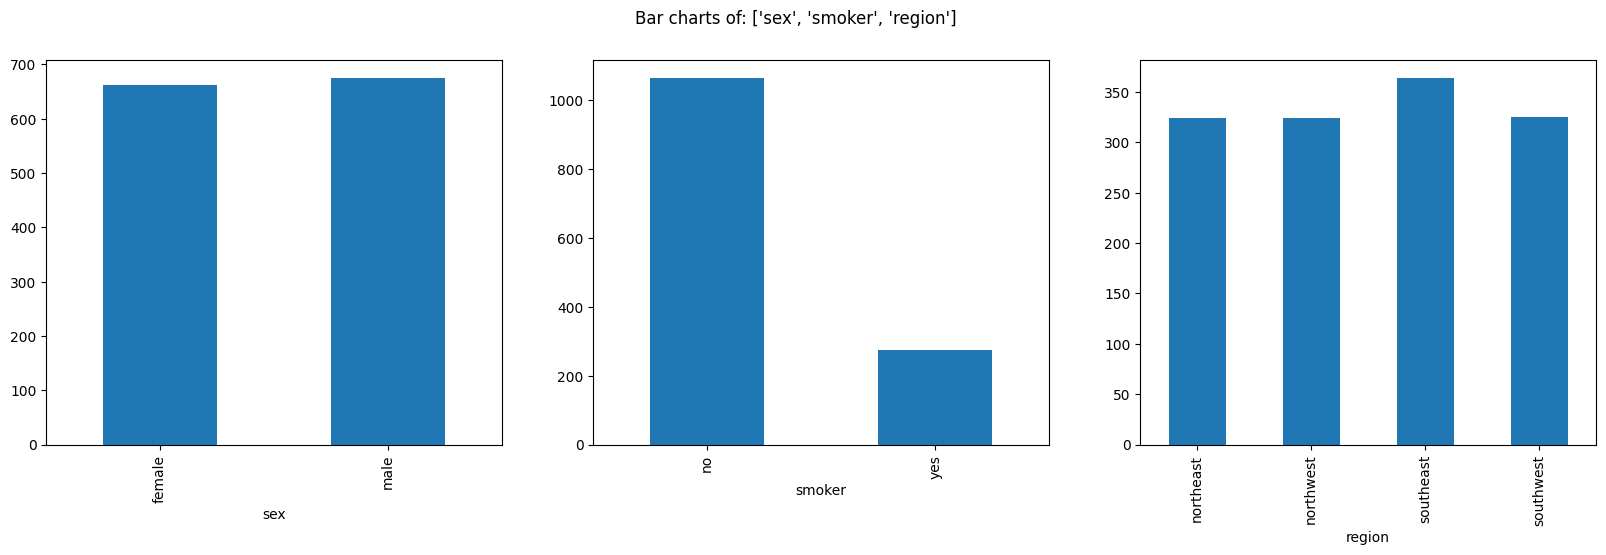

In [ ]:
def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline
  import matplotlib.pyplot as plt

  # Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))
  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


PlotBarCharts(inpData=MediInsurance, colsToPlot=['sex','smoker','region'])

# Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>]],
      dtype=object)

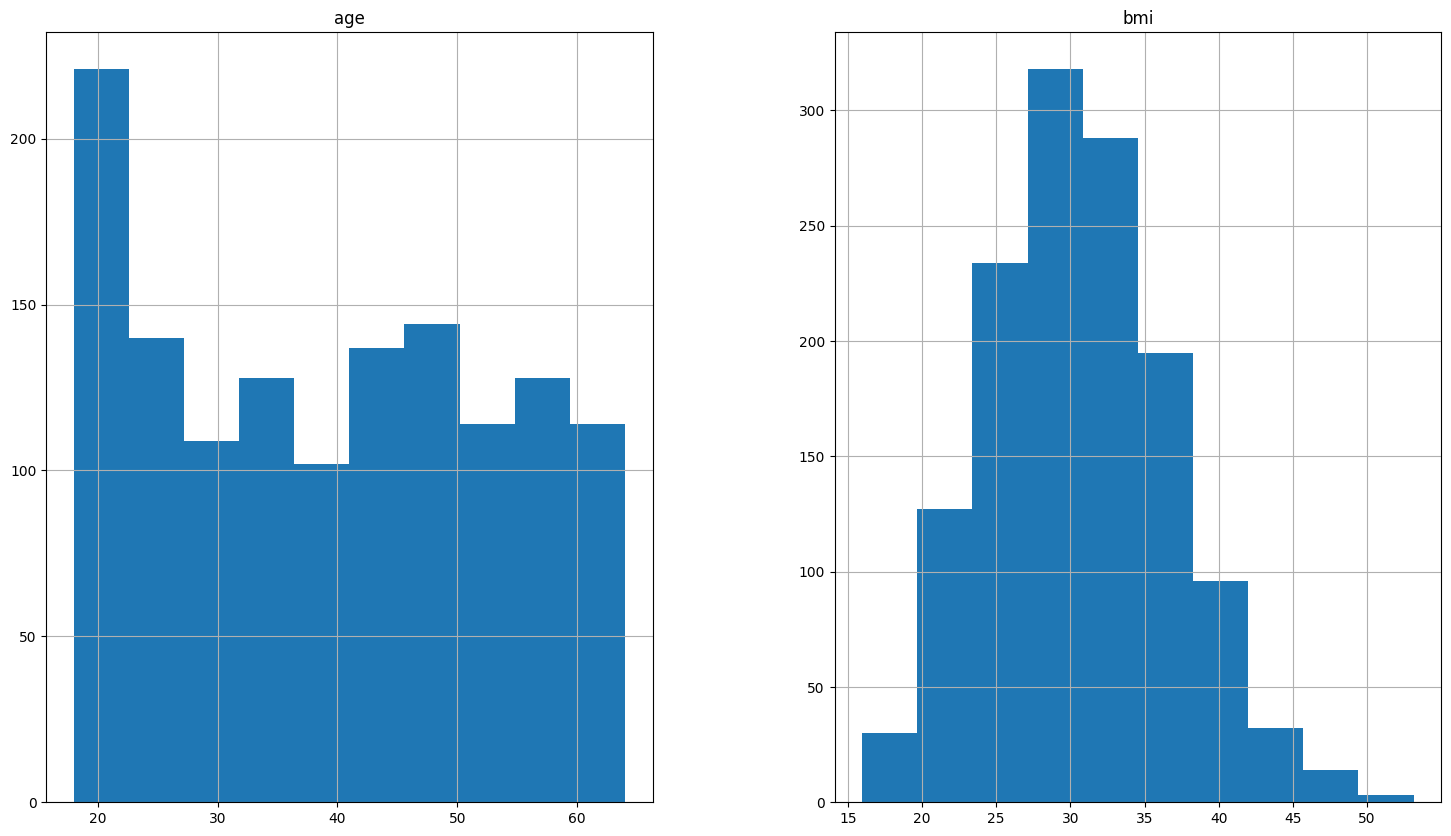

In [ ]:
MediInsurance.hist(['age', 'bmi'], figsize=(18,10))

**Observations From Step 9**

*   Age - Selected
*   Sex - Selected
*   BMI - Selected
*   Children - Selected
*   Smoker - Selected
*   Region - Selected


# Step 10: Outlier Analysis

In [ ]:
MediInsurance['bmi'][MediInsurance['bmi']<60].sort_values(ascending=False)

1317    53.130
1047    52.580
847     50.380
116     49.060
286     48.070
         ...  
1286    17.290
412     17.195
1226    16.815
428     16.815
172     15.960
Name: bmi, Length: 1337, dtype: float64

**Observation: Above result shows the nearest logical value is 50.380, hence, replacing any value above 50 with it**

In [ ]:
MediInsurance['bmi'][MediInsurance['bmi']>50] = 50.380

# Step 11:Visualising Data Distribution after outlier removal

array([[<Axes: title={'center': 'bmi'}>]], dtype=object)

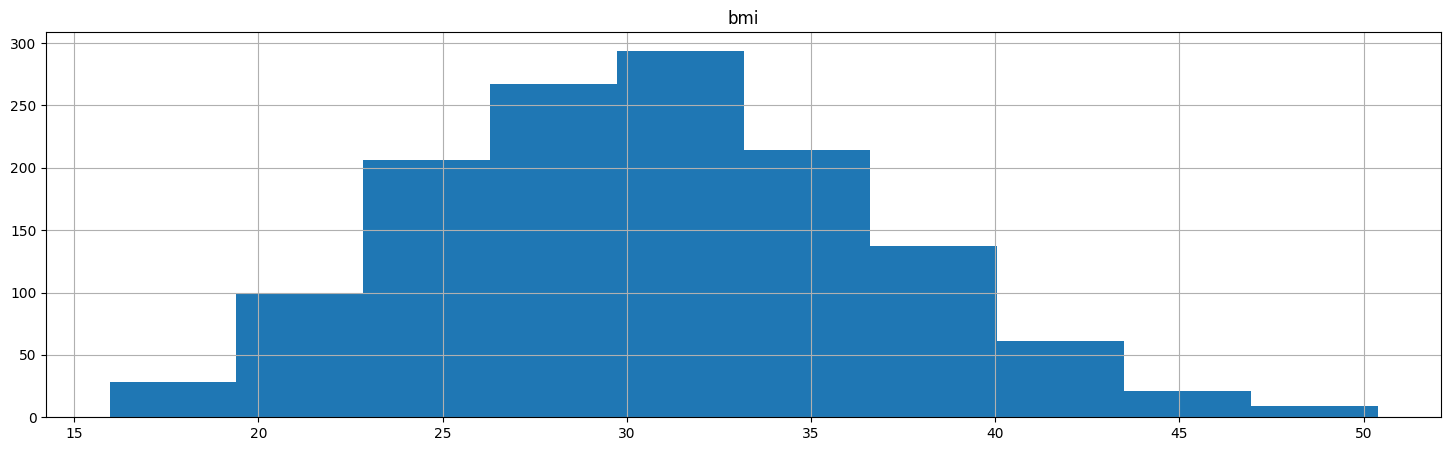

In [ ]:
MediInsurance.hist(['bmi'], figsize = (18,5))

# Step 12: Missing Values Analysis

In [ ]:
MediInsurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observations from Step 12: Missing Value Analysis**


*   No missing values in this data!


*   So no removal of any data samples(rows) is needed.



# Step 13: Feature Selection (Attribute Selection)

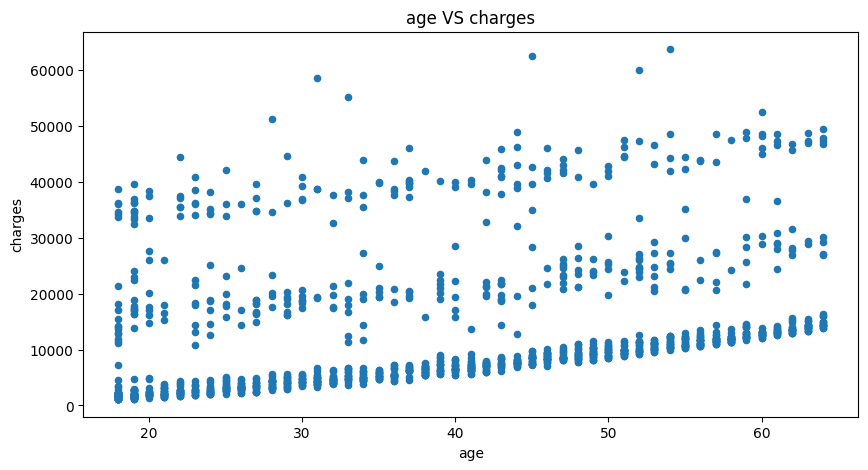

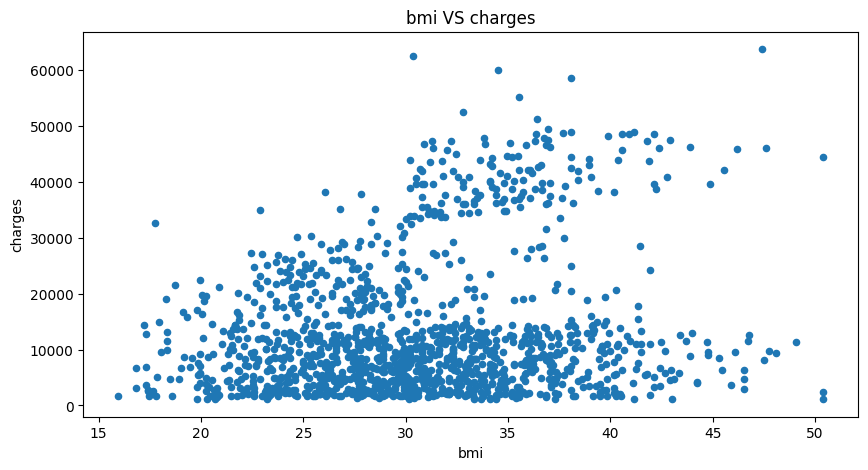

In [ ]:
ContinuousCols=['age','bmi']
CategorialCols=['sex','smoker','region']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    MediInsurance.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')

# Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [ ]:
# Calculating correlation matrix
ContinuousCols=['age','bmi', 'charges']
CategorialCols=['sex','smoker','region']

# Creating the correlation matrix
CorrelationData=MediInsurance[ContinuousCols].corr()
CorrelationData

age       bmi   charges
age      1.000000  0.110415  0.298308
bmi      0.110415  1.000000  0.198457
charges  0.298308  0.198457  1.000000

In [ ]:
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.1 ]

age        0.298308
bmi        0.198457
charges    1.000000
Name: charges, dtype: float64

**Final Selected Continuouscolumns =  bmi and age**

# Step 15: Relationship exploration: Categorical Vs Continuous -- Box Plots


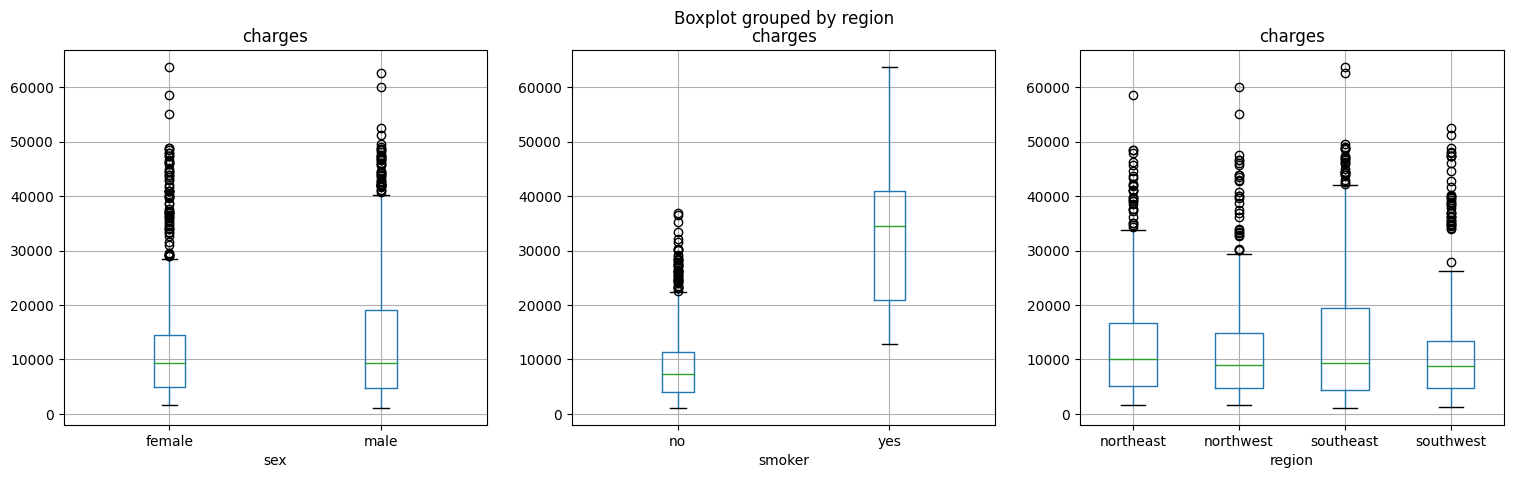

In [ ]:
# Box plots for continuous Target Variable "charges" and Categorical predictors
CategoricalColsList=['sex','smoker','region']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "charges"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    MediInsurance.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

Observations


*   Impact of Smoking: Smoking status has the most substantial impact on insurance
charges. Smokers consistently face higher charges compared to non-smokers,which aligns with the known health risks associated with smoking.
*   Gender Differences: Males tend to have higher insurance charges than females, potentially due to higher health risks or differences in healthcare utilization.

*   Regional Variation: There is some regional variation in charges, with the Southeast region showing the highest median charges. This could be due to differences in healthcare costs or availability across regions.


# Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['sex','smoker','region']
FunctionAnova(inpData=MediInsurance,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

sex is correlated with charges | P-Value: 0.033820791995078286
smoker is correlated with charges | P-Value: 1.4067220949358597e-282
region is correlated with charges | P-Value: 0.03276288025444947


['sex', 'smoker', 'region']

**Selected columns for the prediction are = age, bmi, sex, smoker, region**

In [ ]:
SelectedColumns=['age', 'bmi', 'sex', 'smoker', 'region']

# Selecting final columns
DataForML=MediInsurance[SelectedColumns]
DataForML.head()

age     bmi     sex smoker     region
0   19  27.900  female    yes  southwest
1   18  33.770    male     no  southeast
2   28  33.000    male     no  southeast
3   33  22.705    male     no  northwest
4   32  28.880    male     no  northwest

In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Step 17: Data Pre-processing for Machine Learning Model Building or Model Development

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['charges']=MediInsurance['charges']

# Printing sample rows
DataForML_Numeric.head()

age     bmi  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0   19  27.900        True     False      False        True             False   
1   18  33.770       False      True       True       False             False   
2   28  33.000       False      True       True       False             False   
3   33  22.705       False      True       True       False             False   
4   32  28.880       False      True       True       False             False   

   region_northwest  region_southeast  region_southwest      charges  
0             False             False              True  16884.92400  
1             False              True             False   1725.55230  
2             False              True             False   4449.46200  
3              True             False             False  21984.47061  
4              True             False             False   3866.85520

# Step 18: Machine Learning Model Development:


In [ ]:
DataForML_Numeric.columns


Index(['age', 'bmi', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'charges'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='charges'
# Include the generated dummy variable names in Predictors
Predictors=['age', 'bmi', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
            'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Step 19: Standardization/Normalization of data

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(935, 10)
(935,)
(402, 10)
(402,)


step 20

# Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.7333930896001648

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913  0.190442         0.0       1.0        1.0         0.0   
1  0.239130  0.280070         1.0       0.0        1.0         0.0   
2  0.717391  0.593405         1.0       0.0        1.0         0.0   
3  0.282609  0.535445         0.0       1.0        0.0         1.0   
4  0.282609  0.651656         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0               1.0               0.0   

       

**Final Average Accuracy of the model: 56.12**

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.8675171191536489

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913  0.190442         0.0       1.0        1.0         0.0   
1  0.239130  0.280070         1.0       0.0        1.0         0.0   
2  0.717391  0.593405         1.0       0.0        1.0         0.0   
3  0.282609  0.535445         0.0       1.0        0.0         1.0   
4  0.282609  0.651656         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0      

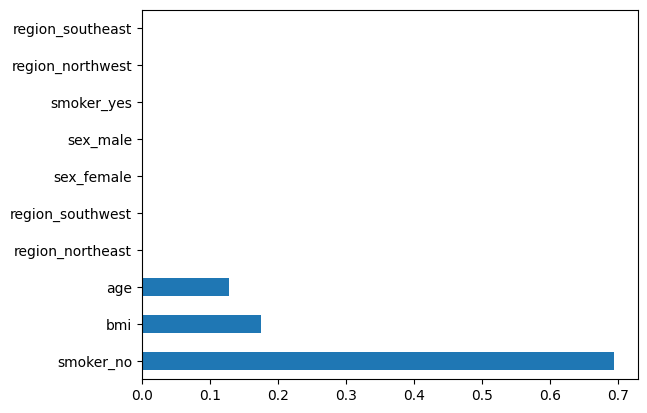

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))

    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Final Average Accuracy of the model: 66.32**

# AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.8339377360655806

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913  0.190442         0.0       1.0        1.0         0.0   
1  0.239130  0.280070         1.0       0.0        1.0         0.0   
2  0.717391  0.593405         1.0       0.0        1.0         0.0   
3  0.282609  0.535445         0.0       1.0        0.0         1.0   
4  0.282609  0.651656         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0 

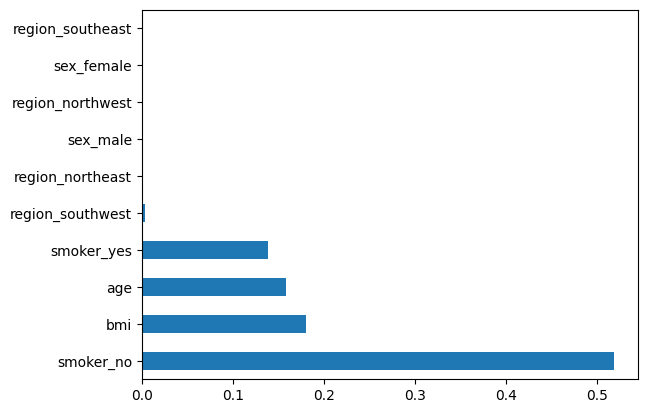

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Final Average Accuracy of the model: 38.17**

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9048476308482536

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913  0.190442         0.0       1.0        1.0         0.0   
1  0.239130  0.280

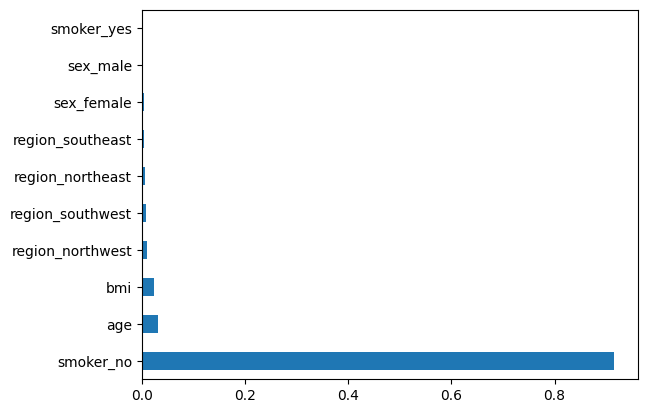

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8836818222092726

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913  0.190442         0.0       1.0        1.0         0.0   
1  0.239130  0.280070         1.0       0.0        1.0         0.0   
2  0.717391  0.593405         1.0       0.0        1.0         0.0   
3  0.282609  0.535445         0.0       1.0        0.0         1.0   
4  0.282609  0.651656         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0               1.0              

# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

%matplotlib inline

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: -0.07983013875351253

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913  0.190442         0.0       1.0        1.0         0.0   
1  0.239130  0.280070         1.0       0.0        1.0         0.0   
2  0.717391  0.593405         1.0       0.0        1.0         0.0   
3  0.282609  0.535445         0.0       1.0        0.0         1.0   
4  0.282609  0.651656         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0               1.0               0.0   

  

# Random Forest Regressor - SELECTED WITH HIGHEST ACCURACY


RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.8655231455504313

##### Model Validation and Accuracy Calculations ##########
        age       bmi  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913  0.190442         0.0       1.0        1.0         0.0   
1  0.239130  0.280070         1.0       0.0        1.0         0.0   
2  0.717391  0.593405         1.0       0.0        1.0         0.0   
3  0.282609  0.535445         0.0       1.0        0.0         1.0   
4  0.282609  0.651656         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0      

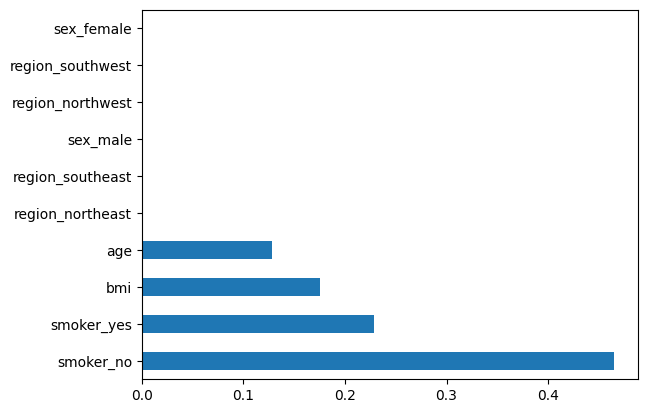

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Final Average Accuracy of the model: 67.75**

# Step 21: Model Deployment

In [ ]:
# Import necessary libraries
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import pydotplus

# Assume X_train, y_train are already defined
# Train a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(rf_model.estimators_[5],
                                out_file=None,
                                feature_names=Predictors,
                                filled=True,
                                rounded=True,
                                special_characters=True)

# Draw the graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show the graph
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.570764 to fit



In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors = ['age', 'bmi', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest',]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1337, 10)
(1337,)


# Cross validating the final model accuracy with less predictors

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Corrected RandomForestRegressor without XGBoost parameters
RegModel = RandomForestRegressor(max_depth=2, n_estimators=1000, random_state=42)

# Running 10-Fold Cross validation on RandomForestRegressor
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))



Accuracy values for 10-fold Cross Validation:
 [52.84035664 51.62930726 53.83539753 42.90268415 55.16587438 49.5152769
 54.17845236 56.1327353  62.49205357 49.20115787]

Final Average Accuracy of the model: 52.79


# Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


# Step 24: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors = ['age', 'bmi', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest',]

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Sample data (You should replace this with your actual data)
data = pd.DataFrame({
    'age': [29, 45, 35, 50, 40, 31, 28, 52, 48, 33],
    'bmi': [22.5, 30.2, 27.8, 31.1, 28.4, 26.1, 24.5, 29.3, 32.0, 23.7],
    'sex_female': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
    'sex_male': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    'smoker_no': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
    'smoker_yes': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    'region_northeast': [0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
    'region_northwest': [1, 0, 0, 0, 1, 0, 1, 0, 0, 1],
    'region_southeast': [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    'region_southwest': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    'charges': [16884, 1725, 4449, 21984, 3866, 3756, 8240, 2741, 3956, 10493]
})

# Separating features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler on the training data and transforming both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train_scaled, y_train)

# Making predictions on the test data
predictions = model.predict(X_test_scaled)

# Calculating the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Printing the predictions
print("\nPredictions:")
print(predictions)


Mean Squared Error: 14222816.445850002

Predictions:
[7400.41 5797.06]


# Deploying the model with few parameters
# Function for predictions API

In [ ]:
import pandas as pd

# Assuming the model and scaler have been trained earlier
# Example: model = RandomForestRegressor(...) and scaler = MinMaxScaler(...)

# Function to generate predictions
def FunctionGeneratePrediction(inp_age, inp_bmi, inp_sex_female, inp_sex_male, inp_smoker_no, inp_smoker_yes,
                               inp_region_northeast, inp_region_northwest, inp_region_southeast, inp_region_southwest):

    # Creating a DataFrame for the input data
    SampleInputData = pd.DataFrame(data=[[inp_age, inp_bmi, inp_sex_female, inp_sex_male, inp_smoker_no, inp_smoker_yes,
                                          inp_region_northeast, inp_region_northwest, inp_region_southeast, inp_region_southwest]],
                                   columns=['age', 'bmi', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
                                            'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'])

    # Scaling the input data
    SampleInputData_scaled = scaler.transform(SampleInputData)

    # Making predictions using the trained model
    prediction = model.predict(SampleInputData_scaled)

    # Returning the predictions as a JSON object
    return pd.DataFrame(data={'Prediction': prediction}).to_json()

# Function call with sample inputs
FunctionGeneratePrediction(inp_age=29, inp_bmi=22.5, inp_sex_female=1, inp_sex_male=0,
                           inp_smoker_no=1, inp_smoker_yes=0, inp_region_northeast=0,
                           inp_region_northwest=1, inp_region_southeast=0, inp_region_southwest=0)


'{"Prediction":{"0":13985.38}}'

# Desktop App deployment: Tkinter package

For the deployement I selected python and the python file is attached to the submission

# END OF PROGRAMMING PROJECT - Savindu Radaliyagoda u3276091